In [1]:
# 필요 라이브러리부터 설치할께요.
!pip install konlpy pandas seaborn gensim wordcloud

     |████████████████████████████████| 292 kB 26.5 MB/s            
     |████████████████████████████████| 23.2 MB 82.3 MB/s            MB 82.3 MB/s eta 0:00:01 |████████████▋                   | 9.2 MB 82.3 MB/s eta 0:00:01��███████████████            | 14.5 MB 82.3 MB/s eta 0:00:01��███▍   | 20.6 MB 82.3 MB/s eta 0:00:01
  Preparing metadata (setup.py) ... done
     |████████████████████████████████| 435 kB 102.4 MB/s            
     |████████████████████████████████| 58 kB 6.4 MB/s             
  Created wheel for gensim: filename=gensim-4.2.0-cp36-cp36m-linux_x86_64.whl size=25525345 sha256=b7c9d16611379d07df06a1cd1f8990fb3d7fe7476077c4d40047507207df16f0
  Stored in directory: /root/.cache/pip/wheels/44/1e/2b/b0056a533d057c3ed56c84fbdd79cca690496f4cd7c03c157c
Successfully built gensim


In [25]:
# 필요 라이브러리부터 설치할께요.
!pip install konlpy pandas seaborn gensim wordcloud mecab-ko

     |████████████████████████████████| 575 kB 26.6 MB/s            
     |████████████████████████████████| 33.2 MB 105.7 MB/s            B/s eta 0:00:01██▊                        | 8.0 MB 105.7 MB/s eta 0:00:01��█████▍                  | 13.9 MB 105.7 MB/s eta 0:00:01| 20.4 MB 105.7 MB/s eta 0:00:01��████████████████▎      | 26.2 MB 105.7 MB/s eta 0:00:01��█▌| 32.6 MB 105.7 MB/s eta 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for mecab-ko-dic: filename=mecab_ko_dic-1.0.0-py3-none-any.whl size=33424414 sha256=e2fd78c96800594ec87f4531681daa8aab186c0ab5981eb9bf6d082e145add03
  Stored in directory: /root/.cache/pip/wheels/5d/af/be/5663c22c6369da4117d4d089d5fdb10ff90b9ff135dffb398d
Successfully built mecab-ko-dic


In [3]:
## import sklearn
import pandas as pd

import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
fm.findSystemFonts()
plt.rcParams['font.family']= ["NanumGothicCoding"]
plt.rcParams["axes.unicode_minus"]=False
# GPU 환경 설정하기
# assert tf.test.is_gpu_available() == True, 'GPU 설정을 확인하세요.'
print(tf.config.list_physical_devices('GPU'))
print(tf.config.list_logical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


InternalError: CUDA runtime implicit initialization on GPU:0 failed. Status: out of memory

In [3]:
train_filename = '/aihub/workspace/스팸 분류/spam.csv'
test_filename = '/aihub/workspace/스팸 분류/spam_test_text.csv'
test_label_filename = '/aihub/workspace/스팸 분류/spam_test_label.csv'

In [4]:
data = pd.read_csv(train_filename)
test_data = pd.read_csv(test_filename)
test_label = pd.read_csv(test_label_filename)

In [9]:
test = pd.concat([test_data['text'], test_label['label']], axis=1)

In [12]:
test[['text', 'label']].to_csv("/aihub/data/spam_test.csv", index=False)

In [10]:
test

,text,label
0,"[Web발신](광고)[강남시셔츠]대륙쵸이스문의""""홈phttp://bit.ly/shi...",spam
1,[Web발신](광고).님한.건.당..원무료거부,spam
2,[Web발신]이태용님월일자전해드리는정보!밑져야본전!pf.kakao.com/_dkBxgj,spam
3,[Web발신]달서구마지막억대분양성당태왕아너스평형무순위접수중청약통장無다주택자가능!,spam
4,[Web발신](광고)개인업오늘하루만%연체나부결도OK카카오ID:HK무료거부,spam
...,...,...
9891,[Web발신]냉온정수기원비데원공기청정기평원제습기.원전기렌지원,ham
9892,(광고)스파클링유흥다이소선정릉모바일앱http://bIt.Ly/LBjVVE무료거부--,spam
9893,(광고)주행ok.님막힘없는배정!무료수신거부..,spam
9894,(광고)대게수산'문자쿠폰행사'킹크랩원->원(물량소진시까지)무료거부,ham


In [11]:
data

,text,label
0,[Web발신]박춘규회원님손절주식은그만월급배만드는법http://lco.jp/eA,spam
1,[Web발신]골든브릿지에서손실을보셨나요??http://bitly.kr/bRGtq[FW],spam
2,[Web발신][대//박]가(.원)입코(WN)드MEP.com,spam
3,[Web발신](광고)이정미님아직도주식하시나요http://pf.kakao.com/_u...,spam
4,[Web발신]송승용님사람이모이는곳에는이유가있습니다하루~정보공개is.gd/JsJP,spam
...,...,...
20095,"[Web발신]이상투자황기봉님""이재훈""투자컨설담당자배정완료.담당자확인▼http://b...",spam
20096,[Web발신](광고)조마?峙???충?矛?%:까지 ↓주소Joma.카JM톡무료거부,spam
20097,[Web발신]김환택님지금이라도늦지않았습니다.월긴급정보http://pf.kakao.c...,spam
20098,[Web발신]년노하우명품구매대행논스토리nonstory.com항상아낌없는사랑과성원에감...,ham


In [263]:
data['label'] = data['label'].map({'spam' : 1, "ham" : 0})

In [267]:
data.head()

,index,text,label
0,0,[Web발신]박춘규회원님손절주식은그만월급배만드는법http://lco.jp/eA,1
1,1,[Web발신]골든브릿지에서손실을보셨나요??http://bitly.kr/bRGtq[FW],1
2,2,[Web발신][대//박]가(.원)입코(WN)드MEP.com,1
3,3,[Web발신](광고)이정미님아직도주식하시나요http://pf.kakao.com/_u...,1
4,4,[Web발신]송승용님사람이모이는곳에는이유가있습니다하루~정보공개is.gd/JsJP,1


In [266]:
data = data.reset_index()

In [61]:
data.iloc[74, :]

index                             74
text     발신 증권 미진 김정태 컨 설 터 배정 수익 확인
label                              1
Name: 74, dtype: object

In [83]:
test_data['text']

0       [Web발신](광고)[강남시셔츠]대륙쵸이스문의""홈phttp://bit.ly/shi...
1                               [Web발신](광고).님한.건.당..원무료거부
2        [Web발신]이태용님월일자전해드리는정보!밑져야본전!pf.kakao.com/_dkBxgj
3            [Web발신]달서구마지막억대분양성당태왕아너스평형무순위접수중청약통장無다주택자가능!
4                [Web발신](광고)개인업오늘하루만%연체나부결도OK카카오ID:HK무료거부
                              ...                        
9891                    [Web발신]냉온정수기원비데원공기청정기평원제습기.원전기렌지원
9892       (광고)스파클링유흥다이소선정릉모바일앱http://bIt.Ly/LBjVVE무료거부--
9893                            (광고)주행ok.님막힘없는배정!무료수신거부..
9894                 (광고)대게수산'문자쿠폰행사'킹크랩원->원(물량소진시까지)무료거부
9895    MMS스팸신고나이가들수록그사람의인생이얼굴에서나타난다고합니다.웃으며보낸사람은웃음주름이...
Name: text, Length: 9896, dtype: object

In [268]:
tmp = data['text']
tmp2 = test_data['text']

In [269]:
for i in range(len(tmp)):
    tmp[i] = tmp[i].replace('[Web발신]', '')
    tmp[i] = tmp[i].replace('발신', '')
    tmp[i] = tmp[i].replace('광고', '')
    tmp[i] = tmp[i].replace('무료', '')
    tmp[i] = tmp[i].replace('거부', '')
    tmp[i] = tmp[i].replace('신고', '')
    tmp[i] = tmp[i].replace('스팸', '')
    tmp[i] = tmp[i].replace('원', '')
    tmp[i] = tmp[i].replace('일', '')
    tmp[i] = tmp[i].replace('월', '')
    tmp[i] = tmp[i].replace('()', '')
    tmp[i] = tmp[i].replace('수신', '')
    tmp[i] = tmp[i].replace('시', '')

for i in range(len(tmp2)):
    tmp2[i] = tmp2[i].replace('[Web발신]', '')
    tmp2[i] = tmp2[i].replace('발신', '')
    tmp2[i] = tmp2[i].replace('광고', '')
    tmp2[i] = tmp2[i].replace('무료', '')
    tmp2[i] = tmp2[i].replace('거부', '')
    tmp2[i] = tmp2[i].replace('신고', '')
    tmp2[i] = tmp2[i].replace('스팸', '')
    tmp2[i] = tmp2[i].replace('원', '')
    tmp2[i] = tmp2[i].replace('일', '')
    tmp2[i] = tmp2[i].replace('월', '')
    tmp2[i] = tmp2[i].replace('()', '')
    tmp2[i] = tmp2[i].replace('수신', '')
    tmp2[i] = tmp2[i].replace('시', '')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from 

In [270]:
for i in range(len(tmp)):
    if mecab.nouns(tmp[i]) != None:
        tmp[i] = " ".join(mecab.nouns(tmp[i]))
    else:
        tmp[i] = " "

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [271]:
for i in range(len(tmp2)):
    if mecab.nouns(tmp2[i]) != None:
        tmp2[i] = " ".join(mecab.nouns(tmp2[i]))
    else:
        tmp2[i] = " "

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [272]:
data["nouns_text"] = tmp
test_data["nouns_text"] = tmp2

In [273]:
data

,index,text,label,nouns_text
0,0,박춘규 회 손절 주식 급 배 법,1,박춘규 회 손절 주식 급 배 법
1,1,골든 브릿지 손실,1,골든 브릿지 손실
2,2,대 박 코,1,대 박 코
3,3,이정미 주식,1,이정미 주식
4,4,송승용 사람 곳 이유 하루 정보 공개,1,송승용 사람 곳 이유 하루 정보 공개
...,...,...,...,...
18381,20095,이상 투자 황기 봉 이재훈 투자 컨 설 담당자 배정 완료 담당자 확인,1,이상 투자 황기 봉 이재훈 투자 컨 설 담당자 배정 완료 담당자 확인
18382,20096,조마 충 矛 주소 카 톡,1,조마 충 矛 주소 카 톡
18383,20097,김 환택 지금 긴급 정보,1,김 환택 지금 긴급 정보
18384,20098,년 노하우 명품 구매 대행 스토리 사랑 성 감사,0,년 노하우 명품 구매 대행 스토리 사랑 성 감사


In [225]:
test_data.head()

,id,text,nouns_text
0,0,발신 광고 강남 시 셔츠 대륙 쵸 이스 문의 홈 무료 거부,발신 광고 강남 시 셔츠 대륙 쵸 이스 문의 홈 무료 거부
1,1,발신 광고 님 당 무료 거부,발신 광고 님 당 무료 거부
2,2,발신 이태용 월일 자전 정보 본전,발신 이태용 월일 자전 정보 본전
3,3,발신 달서구 마지막 억대 분양 성당 태왕 너스 평형 순위 접수 중 청약 통장 주택 가능,발신 달서구 마지막 억대 분양 성당 태왕 너스 평형 순위 접수 중 청약 통장 주택 가능
4,4,발신 광고 개인 업 오늘 하루 연체 부결 카카오 무료 거부,발신 광고 개인 업 오늘 하루 연체 부결 카카오 무료 거부


In [274]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import urllib.request
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [275]:
X_data=data['nouns_text']
y_data=data['label']
X_test=test_data['nouns_text']

In [276]:
X_data

0                             박춘규 회 손절 주식 급 배 법
1                                     골든 브릿지 손실
2                                         대 박 코
3                                        이정미 주식
4                          송승용 사람 곳 이유 하루 정보 공개
                          ...                  
18381    이상 투자 황기 봉 이재훈 투자 컨 설 담당자 배정 완료 담당자 확인
18382                             조마 충 矛 주소 카 톡
18383                             김 환택 지금 긴급 정보
18384                년 노하우 명품 구매 대행 스토리 사랑 성 감사
18385                                  최현 특급 정보
Name: nouns_text, Length: 18386, dtype: object

In [277]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_data) # X_data의 각 행에 토큰화를 수행
sequences = tokenizer.texts_to_sequences(X_data) # 단어를 숫자값, 인덱스로 변환하여 저장
print(sequences[-3:-1])

[[164, 17833, 203, 65, 1], [41, 1571, 683, 110, 2134, 1872, 267, 304, 54]]


In [278]:
word_to_index = tokenizer.word_index
print(len(word_to_index))

35134


In [279]:
threshold = 2
total_cnt = len(word_to_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합(vocabulary)에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

등장 빈도가 1번 이하인 희귀 단어의 수: 8932
단어 집합(vocabulary)에서 희귀 단어의 비율: 25.42266750156543
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 6.0638565095486054


In [280]:
tokenizer = Tokenizer(num_words = total_cnt - rare_cnt + 1) #1번 이하로 등장하는 단어는 제외
tokenizer.fit_on_texts(X_data)
sequences = tokenizer.texts_to_sequences(X_data) # 단어를 숫자값, 인덱스로 변환하여 저장
sequences2 = tokenizer.texts_to_sequences(X_test)

In [281]:
print(sequences[-3:-1])

[[164, 17833, 203, 65, 1], [41, 1571, 683, 110, 2134, 1872, 267, 304, 54]]


메일의 최대 길이 : 38
메일의 평균 길이 : 8.011476


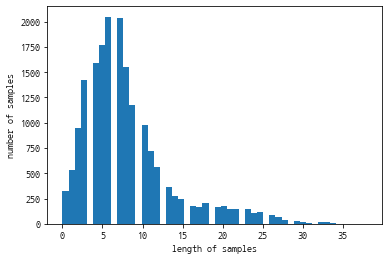

In [282]:
X_data = sequences
X_test = sequences2
print('메일의 최대 길이 : %d' % max(len(l) for l in X_data))
print('메일의 평균 길이 : %f' % (sum(map(len, X_data))/len(X_data)))
plt.hist([len(s) for s in X_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [283]:
pd.DataFrame(X_data).shape

(18386, 38)

In [284]:
pd.DataFrame(X_test).shape

(9896, 33)

In [285]:
vocab_size = vocab_size = total_cnt - rare_cnt + 1
print('단어 집합의 크기: {}'.format((vocab_size)))

단어 집합의 크기: 26203


In [286]:
max_len = 38
# 전체 데이터셋의 길이는 max_len으로 맞춥니다.
data = pad_sequences(X_data, maxlen = max_len)
print("훈련 데이터의 크기(shape): ", data.shape)

훈련 데이터의 크기(shape):  (18386, 38)


In [287]:
test = pad_sequences(X_test, maxlen = max_len)

In [288]:
pd.DataFrame(test).shape

(9896, 38)

In [289]:
n_of_train = int(len(sequences) * 0.8)
n_of_test = int(len(sequences) - n_of_train)
print('훈련 데이터의 개수 :',n_of_train)
print('테스트 데이터의 개수:',n_of_test)

훈련 데이터의 개수 : 14708
테스트 데이터의 개수: 3678


In [290]:
X_test = data[n_of_train:] 
y_test = np.array(y_data[n_of_train:]) 
X_train = data[:n_of_train] 
y_train = np.array(y_data[:n_of_train])

In [291]:
from tensorflow.keras.callbacks import EarlyStopping

In [292]:
es = EarlyStopping(monitor='val_loss', # 관측 대상 / 아직 지정 x
                   min_delta=0,        # 최소한 나빠지지 않으면 괜찮아
                   patience=5,         # 성능 개선되지 않는걸 얼마나 참을래? 5번
                   verbose=1,
                   restore_best_weights=True) 

In [293]:
import tensorflow

In [294]:
tensorflow.keras.backend.clear_session()

In [296]:
from tensorflow.keras.layers import SimpleRNN, Embedding, Dense
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(Embedding(vocab_size, 100)) # 임베딩 벡터의 차원은 32
model.add(SimpleRNN(100, return_sequences=True)) # RNN 셀의 hidden_size는 32
model.add(Dense(1, activation='sigmoid'))


model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc', get_f1])
history = model.fit(X_train, y_train, callbacks=[es], epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
184/184 [==============================] - 12s 63ms/step - loss: 0.6470 - acc: 0.6333 - get_f1: 1.2406 - val_loss: 0.6091 - val_acc: 0.6763 - val_get_f1: 1.3049
Epoch 2/10
184/184 [==============================] - 11s 60ms/step - loss: 0.5911 - acc: 0.6848 - get_f1: 1.3161 - val_loss: 0.5883 - val_acc: 0.6834 - val_get_f1: 1.3072
Epoch 3/10
184/184 [==============================] - 11s 59ms/step - loss: 0.5743 - acc: 0.6956 - get_f1: 1.3265 - val_loss: 0.6011 - val_acc: 0.6540 - val_get_f1: 1.3227
Epoch 4/10
184/184 [==============================] - 11s 59ms/step - loss: 0.5814 - acc: 0.6893 - get_f1: 1.3171 - val_loss: 0.5833 - val_acc: 0.6862 - val_get_f1: 1.3106
Epoch 5/10
184/184 [==============================] - 11s 60ms/step - loss: 0.5619 - acc: 0.6952 - get_f1: 1.3189 - val_loss: 0.5810 - val_acc: 0.6871 - val_get_f1: 1.3117
Epoch 6/10
184/184 [==============================] - 13s 73ms/step - loss: 0.5731 - acc: 0.6888 - get_f1: 1.3089 - val_loss: 0.5842 - val_a

In [257]:
model.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or calling `fit()` with some data, or specify an `input_shape` argument in the first layer(s) for automatic build.

In [248]:
pred = model.predict(test)

In [249]:
pred

array([[0.99940073],
       [0.99885654],
       [0.99996614],
       ...,
       [0.9975079 ],
       [0.03626436],
       [0.00177936]], dtype=float32)

In [7]:
test_data.head()

,id,text
0,0,"[Web발신](광고)[강남시셔츠]대륙쵸이스문의""""홈phttp://bit.ly/shi..."
1,1,[Web발신](광고).님한.건.당..원무료거부
2,2,[Web발신]이태용님월일자전해드리는정보!밑져야본전!pf.kakao.com/_dkBxgj
3,3,[Web발신]달서구마지막억대분양성당태왕아너스평형무순위접수중청약통장無다주택자가능!
4,4,[Web발신](광고)개인업오늘하루만%연체나부결도OK카카오ID:HK무료거부


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20100 entries, 0 to 20099
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    20089 non-null  object
 1   label   20100 non-null  object
dtypes: object(2)
memory usage: 314.2+ KB


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


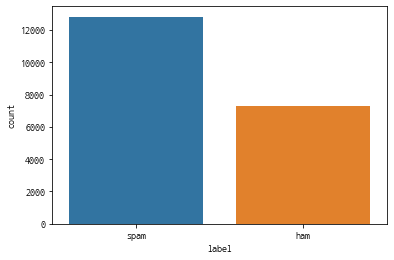

In [11]:
sns.countplot(data['label'])
plt.show()

In [12]:
data.describe()

,text,label
count,20089,20100
unique,18386,2
top,[Web발신]회원님예치금원보유중보관기간끝납니다해저.한국<<안심다운로드코드,spam
freq,107,12817


In [264]:
data = data.drop_duplicates(['text'], keep='first', inplace=False, ignore_index=False)
data.describe()

,label
count,18387.000000
mean,0.624517
std,0.484260
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [265]:
data = data.dropna()

In [15]:
data['short_text'] = data['text'].str.slice(start=0, stop=20)

In [16]:
data

,text,label,short_text
0,[Web발신]박춘규회원님손절주식은그만월급배만드는법http://lco.jp/eA,spam,[Web발신]박춘규회원님손절주식은그만
1,[Web발신]골든브릿지에서손실을보셨나요??http://bitly.kr/bRGtq[FW],spam,[Web발신]골든브릿지에서손실을보셨나
2,[Web발신][대//박]가(.원)입코(WN)드MEP.com,spam,[Web발신][대//박]가(.원)입코
3,[Web발신](광고)이정미님아직도주식하시나요http://pf.kakao.com/_u...,spam,[Web발신](광고)이정미님아직도주식
4,[Web발신]송승용님사람이모이는곳에는이유가있습니다하루~정보공개is.gd/JsJP,spam,[Web발신]송승용님사람이모이는곳에는
...,...,...,...
20095,"[Web발신]이상투자황기봉님""이재훈""투자컨설담당자배정완료.담당자확인▼http://b...",spam,"[Web발신]이상투자황기봉님""이재훈"""
20096,[Web발신](광고)조마?峙???충?矛?%:까지 ↓주소Joma.카JM톡무료거부,spam,[Web발신](광고)조마?峙???충?
20097,[Web발신]김환택님지금이라도늦지않았습니다.월긴급정보http://pf.kakao.c...,spam,[Web발신]김환택님지금이라도늦지않았
20098,[Web발신]년노하우명품구매대행논스토리nonstory.com항상아낌없는사랑과성원에감...,ham,[Web발신]년노하우명품구매대행논스토


In [20]:
tmp = list(data['text'])

In [21]:
for i in range(len(tmp)):
    tmp[i] = tmp[i].replace('[Web발신]', '')
    tmp[i] = tmp[i].replace('발신', '')
    tmp[i] = tmp[i].replace('광고', '')
    tmp[i] = tmp[i].replace('무료', '')
    tmp[i] = tmp[i].replace('거부', '')
    tmp[i] = tmp[i].replace('신고', '')
    tmp[i] = tmp[i].replace('스팸', '')
    tmp[i] = tmp[i].replace('원', '')
    tmp[i] = tmp[i].replace('일', '')
    tmp[i] = tmp[i].replace('월', '')
    tmp[i] = tmp[i].replace('()', '')
    tmp[i] = tmp[i].replace('수신', '')
    tmp[i] = tmp[i].replace('시', '')

In [22]:
data['new_text'] = tmp

In [23]:
data

,text,label,new_text
0,[Web발신]박춘규회원님손절주식은그만월급배만드는법http://lco.jp/eA,spam,박춘규회님손절주식은그만급배만드는법http://lco.jp/eA
1,[Web발신]골든브릿지에서손실을보셨나요??http://bitly.kr/bRGtq[FW],spam,골든브릿지에서손실을보셨나요??http://bitly.kr/bRGtq[FW]
2,[Web발신][대//박]가(.원)입코(WN)드MEP.com,spam,[대//박]가(.)입코(WN)드MEP.com
3,[Web발신](광고)이정미님아직도주식하시나요http://pf.kakao.com/_u...,spam,이정미님아직도주식하나요http://pf.kakao.com/_uHxlgj/
4,[Web발신]송승용님사람이모이는곳에는이유가있습니다하루~정보공개is.gd/JsJP,spam,송승용님사람이모이는곳에는이유가있습니다하루~정보공개is.gd/JsJP
...,...,...,...
20095,"[Web발신]이상투자황기봉님""이재훈""투자컨설담당자배정완료.담당자확인▼http://b...",spam,"이상투자황기봉님""이재훈""투자컨설담당자배정완료.담당자확인▼http://bitly.kr..."
20096,[Web발신](광고)조마?峙???충?矛?%:까지 ↓주소Joma.카JM톡무료거부,spam,조마?峙???충?矛?%:까지 ↓주소Joma.카JM톡
20097,[Web발신]김환택님지금이라도늦지않았습니다.월긴급정보http://pf.kakao.c...,spam,김환택님지금이라도늦지않았습니다.긴급정보http://pf.kakao.com/_YnWT...
20098,[Web발신]년노하우명품구매대행논스토리nonstory.com항상아낌없는사랑과성원에감...,ham,년노하우명품구매대행논스토리nonstory.com항상아낌없는사랑과성에감사드립니다.


In [21]:
# 텍스트 길이 분포와 최대 길이를 확인합니다.
text_length = []

for text in data['text']:
    text_length.append(len(text))

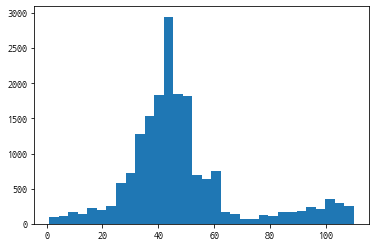

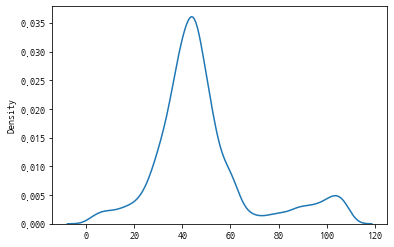

In [22]:
plt.hist(text_length, bins=32)
plt.show()

sns.kdeplot(text_length)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


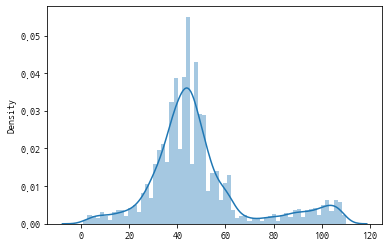

In [23]:
sns.distplot(text_length, hist=True, bins=64)
plt.show()

In [15]:
pd.DataFrame(text_length).describe()

,0
count,18386.000000
mean,48.199282
std,20.703908
min,1.000000
25%,37.000000
50%,44.000000
75%,53.000000
max,110.000000


#### 2-2. 형태소/명사 추출

In [16]:
# konlpy를 활용하여 태깅 클래스를 불러옵니다.
import nltk
from konlpy.tag import Mecab

mecab = Mecab()

In [17]:
# 태깅 클래스를 활용하여 형태소/명사를 추출합니다.
morphs_data = []
for text in data['text']:
    morphs_data.append(mecab.morphs(text))
print(len(morphs_data))
morphs_data[:1]

18386


[['[',
  'Web',
  '발신',
  ']',
  '박춘규',
  '회원',
  '님',
  '손절',
  '주식',
  '은',
  '그만',
  '월급',
  '배',
  '만드',
  '는',
  '법',
  'http',
  ':',
  '/',
  '/',
  'lco',
  '.',
  'jp',
  '/',
  'eA']]

In [18]:
nouns_data = []
for text in data['text']:
    nouns_data.append(mecab.nouns(text))
print(len(nouns_data))
nouns_data[:1]

18386


[['발신', '박춘규', '회원', '손절', '주식', '월급', '배', '법']]

In [19]:
# Number of Samples / Number of words per sample 확인합니다.
# https://developers.google.com/machine-learning/guides/text-classification/step-2-5 참고
nuber_of_samples = len(morphs_data)
print(len(morphs_data))
print(len(nouns_data))

18386
18386


In [20]:
number_of_words_per_morphs = 0
number_of_words_per_nouns = 0

for i in range(nuber_of_samples):
    number_of_words_per_morphs += len(morphs_data[i])
    number_of_words_per_nouns += len(nouns_data[i])
    
number_of_words_per_morphs /= nuber_of_samples
number_of_words_per_nouns /= nuber_of_samples

print(nuber_of_samples/number_of_words_per_morphs)
print(nuber_of_samples/number_of_words_per_nouns)

671.5396394034025
1724.6137787482398


#### 2-3. NLTK Text로 변환

In [159]:
# Tokenize한 문자 데이터를 하나의 nltk.Text로 변환합니다.
join_data = " ".join(data['new_text'])

morphs = mecab.morphs(join_data)
nouns = mecab.nouns(join_data)

In [160]:
nltk_morphs_data = nltk.Text(morphs)
nltk_nouns_data = nltk.Text(nouns)

In [161]:
nltk_morphs_data

<Text: 박춘규 회 님 손절 주식 은 그만 급...>

In [162]:
type(nltk_morphs_data)

nltk.text.Text

#### 2-4. Frequency plot

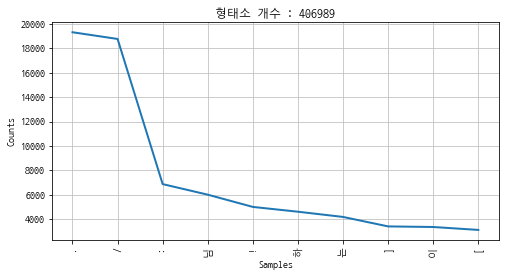

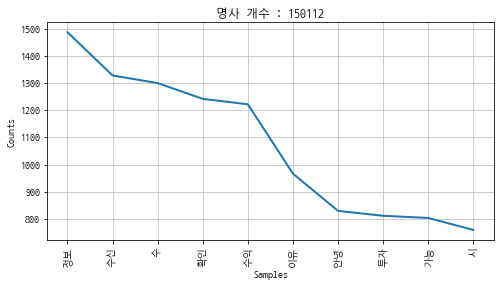

In [163]:
# 형태소/명사 추출 각각 단어 분포를 확인합니다.
plt.figure(figsize=(8,4))
plt.title("형태소 개수 : " + str(len(nltk_morphs_data.tokens)))
nltk_morphs_data.plot(10)
plt.figure(figsize=(8,4))
plt.title("명사 개수 : " + str(len(nltk_nouns_data.tokens)))
nltk_nouns_data.plot(10)
plt.show()

In [164]:
# 어떤 단어(스팸, 주식...)의 유사 단어를 확인합니다.
nltk_morphs_data.similar('광고')

No matches


In [165]:
# 단어 사전을 확인합니다.
nltk_nouns_data.similar('광고')

No matches


In [166]:
nltk_morphs_data.concordance('광고',width=20,lines=5)

no matches


In [167]:
nltk_nouns_data.concordance('광고',width=20,lines=5)

no matches


In [168]:
nltk_nouns_data.index('광고')

ValueError: '광고' is not in list

#### 2-7. Collocation

In [169]:
# 연어(collocation)들을 확인합니다.
nltk_morphs_data.collocations(window_size=5)
print("*"*50)
nltk_nouns_data.collocations(window_size=5)

kakao com; http nazr; KISA 메시지; hoy HQv; 다이소 선정릉; https tuney; 홍지윤
종잣돈; hoy rrzSz; http bitly; ㅋㅋㅋ ㅋㅋㅋ; tuney mdFoyK; GCtvj friend;
OOOOOOOO 사나이; 선정릉 http; http bIt; 다이소 http; com GCtvj; Nam 깅컨셉룸; cot
net; MyOTP myotp
**************************************************
다이소 선정릉; 홍지윤 종잣돈; 이재훈 담당자; 김정태 서포터; 김지훈 관리사; 스파클 선정릉; 스파클 다이소; 스포츠
실시간; 전업주부 장영옥; 컨설팅 이페이; 네이처 컬렉션; 상품명 세탁기; 코오롱 모나미; 전업주부 강현주; 담당자 담당자;
케이블 체납금; 중도금 무이자; 퍼펙트 싸이클론; 이페이 지난달; 플란트 플란트


#### 3. WordCloud

#### 3-1. Morphs vs Nouns

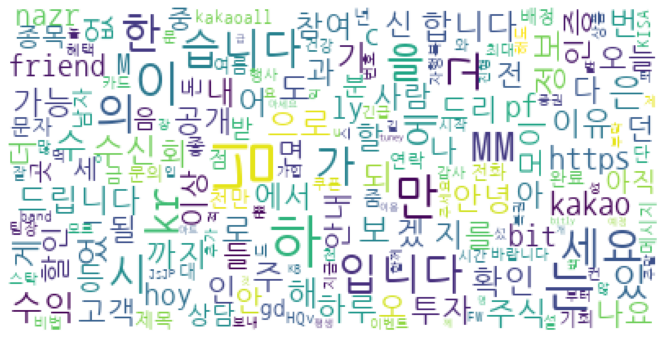

In [170]:
# 형태소와 명사 추출 각각에 대해 wordcloud로 확인합니다.
import matplotlib.font_manager as font_manager
from wordcloud import WordCloud
NGC_path = font_manager.findfont('NanumGothicCoding')
#wc = WordCloud(font_path=NGC_path,max_font_size=40).generate(constitution)
wc = WordCloud(font_path=NGC_path,max_font_size=40,background_color="white",collocations=False).generate(' '.join(nltk_morphs_data))
plt.figure(figsize=(12,6))
plt.imshow(wc)
plt.axis("off")
plt.show()

#### 3-2. Ham vs Spam

In [182]:
# 명사 추출한 결과를 Ham과 Spam에 대해 wordcloud로 확인합니다.
nltk_ham = nltk.Text(mecab.nouns(" ".join(data.loc[data['label']==0]['new_text'])))
nltk_spam = nltk.Text(mecab.nouns(" ".join(data.loc[data['label']==1]['new_text'])))

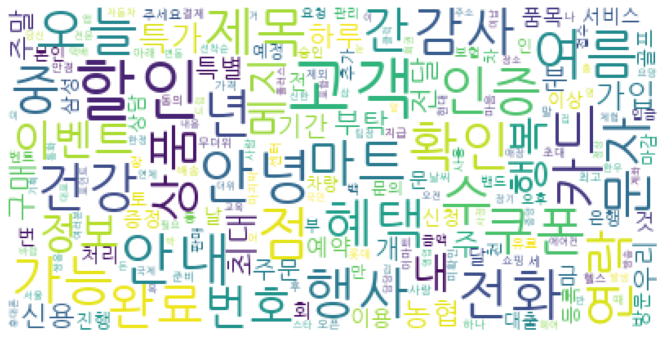

In [183]:
import matplotlib.font_manager as font_manager
from wordcloud import WordCloud
NGC_path = font_manager.findfont('NanumGothicCoding')
#wc = WordCloud(font_path=NGC_path,max_font_size=40).generate(constitution)
wc = WordCloud(font_path=NGC_path,max_font_size=40,background_color="white",collocations=False).generate(' '.join(nltk_ham))
plt.figure(figsize=(12,6))
plt.imshow(wc)
plt.axis("off")
plt.show()

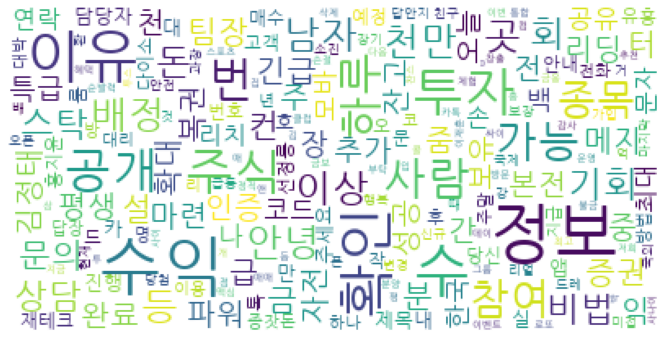

In [185]:
import matplotlib.font_manager as font_manager
from wordcloud import WordCloud
NGC_path = font_manager.findfont('NanumGothicCoding')
#wc = WordCloud(font_path=NGC_path,max_font_size=40).generate(constitution)
wc = WordCloud(font_path=NGC_path,max_font_size=40,background_color="white",collocations=False).generate(' '.join(nltk_spam))
plt.figure(figsize=(12,6))
plt.imshow(wc)
plt.axis("off")
plt.show()

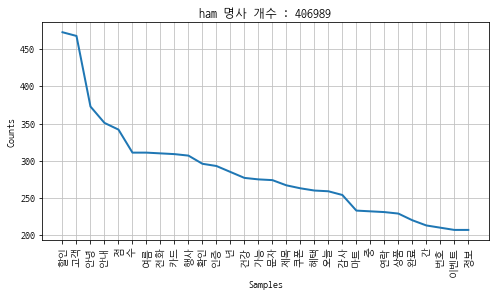

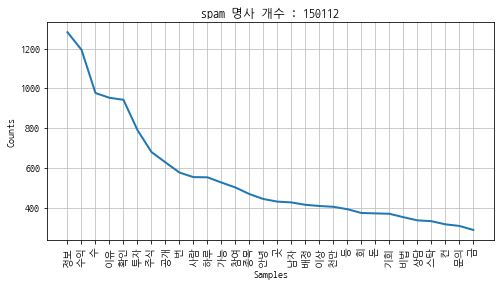

In [186]:
# 형태소/명사 추출 각각 단어 분포를 확인합니다.
plt.figure(figsize=(8,4))
plt.title("ham 명사 개수 : " + str(len(nltk_morphs_data.tokens)))
nltk_ham.plot(30)
plt.figure(figsize=(8,4))
plt.title("spam 명사 개수 : " + str(len(nltk_nouns_data.tokens)))
nltk_spam.plot(30)
plt.show()

In [24]:
## import sklearn
import pandas as pd
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import tensorflow as tf
import nltk
from sklearn.linear_model import SGDClassifier
from konlpy.tag import Mecab
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
mecab = Mecab()
#fm.findSystemFonts()
plt.rcParams['font.family']= ["NanumGothicCoding"]
plt.rcParams["axes.unicode_minus"]=False
# GPU 환경 설정하기
# assert tf.test.is_gpu_available() == True, 'GPU 설정을 확인하세요.'
print(tf.config.list_physical_devices('GPU'))
print(tf.config.list_logical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
[LogicalDevice(name='/device:GPU:0', device_type='GPU')]


In [162]:
## import sklearn
import numpy as np
import pandas as pd
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import pickle
import tensorflow as tf
import nltk
from sklearn.linear_model import SGDClassifier
from konlpy.tag import Mecab
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
mecab = Mecab()
#fm.findSystemFonts()
plt.rcParams['font.family']= ["NanumGothicCoding"]
plt.rcParams["axes.unicode_minus"]=False
# GPU 환경 설정하기
# assert tf.test.is_gpu_available() == True, 'GPU 설정을 확인하세요.'
print(tf.config.list_physical_devices('GPU'))
print(tf.config.list_logical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
[LogicalDevice(name='/device:GPU:0', device_type='GPU')]


In [32]:
data['label'] = data['label'].map({'spam' : 1, "ham" : 0})

In [15]:
data['label'].unique()

array([1, 0])

In [28]:
data['short_text'] = data['text'][:20]

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20100 entries, 0 to 20099
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    20089 non-null  object
 1   label   20100 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 314.2+ KB


In [177]:
data

array([[   0,    0,    0, ...,  407,  196,  296],
       [   0,    0,    0, ...,  616, 4524,  442],
       [   0,    0,    0, ...,  211,    7,  142],
       ...,
       [   0,    0,    0, ...,   10,   77,    8],
       [   0,    0,    0, ...,  277,  600,   63],
       [   0,    0,    0, ...,   16,  119,    8]], dtype=int32)

In [174]:
from sklearn.model_selection import train_test_split

In [183]:
x_train, x_val, y_train, y_val = train_test_split(data['text'], data['label'], test_size=0.1, stratify=data['label'])

In [184]:
x_train.shape, x_val.shape, y_train.shape, y_val.shape

((16547,), (1839,), (16547,), (1839,))

In [185]:
x_test = test_data['text']

#### 3-1. N-grams Vectorize [참고](https://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html#extracting-features-from-text-files)

In [186]:
from sklearn.feature_extraction.text import CountVectorizer

In [187]:
count_vect = CountVectorizer(max_features=20000, ngram_range=(1,2))

In [188]:
cv_x_train = count_vect.fit_transform(x_train)
cv_x_val = count_vect.transform(x_val)
cv_x_test = count_vect.transform(x_test)

In [189]:
cv_x_train.shape, cv_x_val.shape

((16547, 20000), (1839, 20000))

In [190]:
tf_idf = TfidfTransformer(sublinear_tf=True)

In [191]:
tf_idf_x_train = tf_idf.fit_transform(cv_x_train)
tf_idf_x_val = tf_idf.transform(cv_x_val)
tf_idf_x_test = tf_idf.transform(cv_x_test)

In [192]:
import tensorflow as tf
from tensorflow import keras

In [193]:
tf_idf_x_train.shape

(16547, 20000)

In [194]:
from keras.callbacks import Callback,ModelCheckpoint
from keras.models import Sequential,load_model
from keras.layers import Dense, Dropout, SimpleRNN, Embedding
from keras.wrappers.scikit_learn import KerasClassifier
import keras.backend as K

In [195]:
def get_f1(y_true, y_pred): #taken from old keras source code
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [196]:
from sklearn import metrics
#############
# Your Code #
#############
keras.backend.clear_session()

model = keras.models.Sequential()

#model.add( keras.layers.Input( shape=(tf_idf_x_train.shape[1], )))

model.add(Embedding(tf_idf_x_train.shape[1], 100))
model.add(SimpleRNN(100))

# model.add( keras.layers.Dense(2048, activation='swish'))
# model.add( keras.layers.Dense(2048, activation='swish'))

# model.add( keras.layers.BatchNormalization())
# model.add( keras.layers.Dropout(0.2))

model.add( keras.layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=keras.optimizers.Adam(),
              loss=keras.losses.BinaryCrossentropy(),
              metrics=['accuracy', get_f1])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 32)          640000    
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 32)                2080      
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 642,113
Trainable params: 642,113
Non-trainable params: 0
_________________________________________________________________


In [45]:
from tensorflow.keras.callbacks import EarlyStopping

In [46]:
es = EarlyStopping(monitor='val_loss', # 관측 대상 / 아직 지정 x
                   min_delta=0,        # 최소한 나빠지지 않으면 괜찮아
                   patience=5,         # 성능 개선되지 않는걸 얼마나 참을래? 5번
                   verbose=1,
                   restore_best_weights=True) 

In [ ]:
model.fit(tf_idf_x_train.toarray(),
          y_train,
          validation_split=0.2,
          callbacks=[es],       # Early Stopping 적용
          verbose=1, epochs=50)

Epoch 1/50
  2/414 [..............................] - ETA: 6:25:39 - loss: 0.7177 - accuracy: 0.5469 - get_f1: 0.7037

In [ ]:
model.save('model3.h5')

In [197]:
from sklearn import metrics
#############
# Your Code #
#############
keras.backend.clear_session()

model = keras.models.Sequential()

model.add( keras.layers.Input( shape=(tf_idf_x_train.shape[1], )))

model.add( keras.layers.Dense(4096, activation='swish'))
model.add( keras.layers.Dense(4096, activation='swish'))

model.add( keras.layers.BatchNormalization())
model.add( keras.layers.Dropout(0.2))

model.add( keras.layers.Dense(2048, activation='swish'))
model.add( keras.layers.Dense(2048, activation='swish'))

model.add( keras.layers.BatchNormalization())
model.add( keras.layers.Dropout(0.2))

model.add( keras.layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=keras.optimizers.Adam(),
              loss=keras.losses.BinaryCrossentropy(),
              metrics=['accuracy', get_f1])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4096)              81924096  
_________________________________________________________________
dense_1 (Dense)              (None, 4096)              16781312  
_________________________________________________________________
batch_normalization (BatchNo (None, 4096)              16384     
_________________________________________________________________
dropout (Dropout)            (None, 4096)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 2048)              8390656   
_________________________________________________________________
dense_3 (Dense)              (None, 2048)              4196352   
_________________________________________________________________
batch_normalization_1 (Batch (None, 2048)              8

In [65]:
test_data

,id,text
0,0,"[Web발신](광고)[강남시셔츠]대륙쵸이스문의""""홈phttp://bit.ly/shi..."
1,1,[Web발신](광고).님한.건.당..원무료거부
2,2,[Web발신]이태용님월일자전해드리는정보!밑져야본전!pf.kakao.com/_dkBxgj
3,3,[Web발신]달서구마지막억대분양성당태왕아너스평형무순위접수중청약통장無다주택자가능!
4,4,[Web발신](광고)개인업오늘하루만%연체나부결도OK카카오ID:HK무료거부
...,...,...
9891,9891,[Web발신]냉온정수기원비데원공기청정기평원제습기.원전기렌지원
9892,9892,(광고)스파클링유흥다이소선정릉모바일앱http://bIt.Ly/LBjVVE무료거부--
9893,9893,(광고)주행ok.님막힘없는배정!무료수신거부..
9894,9894,(광고)대게수산'문자쿠폰행사'킹크랩원->원(물량소진시까지)무료거부


In [1]:
import pandas as pd

In [ ]:
test_text = pd.read_csv()

In [78]:
tf_idf_x_test.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [79]:
test_pred = model.predict(tf_idf_x_test.toarray())

In [250]:
test_result = np.round(pred, 0)

In [251]:
test_result

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [0.],
       [0.]], dtype=float32)

In [252]:
tmp = []

for i in test_result:
    if i == 1:
        tmp.append("spam")
    else:
        tmp.append("ham")

In [253]:
test_data['label'] = tmp

In [294]:
test_data

,id,text,label
0,0,"[Web발신](광고)[강남시셔츠]대륙쵸이스문의""""홈phttp://bit.ly/shi...",1.0
1,1,[Web발신](광고).님한.건.당..원무료거부,1.0
2,2,[Web발신]이태용님월일자전해드리는정보!밑져야본전!pf.kakao.com/_dkBxgj,1.0
3,3,[Web발신]달서구마지막억대분양성당태왕아너스평형무순위접수중청약통장無다주택자가능!,0.0
4,4,[Web발신](광고)개인업오늘하루만%연체나부결도OK카카오ID:HK무료거부,1.0
...,...,...,...
9891,9891,[Web발신]냉온정수기원비데원공기청정기평원제습기.원전기렌지원,0.0
9892,9892,(광고)스파클링유흥다이소선정릉모바일앱http://bIt.Ly/LBjVVE무료거부--,1.0
9893,9893,(광고)주행ok.님막힘없는배정!무료수신거부..,1.0
9894,9894,(광고)대게수산'문자쿠폰행사'킹크랩원->원(물량소진시까지)무료거부,1.0


In [254]:
test_data

,id,text,nouns_text,label
0,0,발신 광고 강남 시 셔츠 대륙 쵸 이스 문의 홈 무료 거부,발신 광고 강남 시 셔츠 대륙 쵸 이스 문의 홈 무료 거부,spam
1,1,발신 광고 님 당 무료 거부,발신 광고 님 당 무료 거부,spam
2,2,발신 이태용 월일 자전 정보 본전,발신 이태용 월일 자전 정보 본전,spam
3,3,발신 달서구 마지막 억대 분양 성당 태왕 너스 평형 순위 접수 중 청약 통장 주택 가능,발신 달서구 마지막 억대 분양 성당 태왕 너스 평형 순위 접수 중 청약 통장 주택 가능,spam
4,4,발신 광고 개인 업 오늘 하루 연체 부결 카카오 무료 거부,발신 광고 개인 업 오늘 하루 연체 부결 카카오 무료 거부,spam
...,...,...,...,...
9891,9891,발신 냉온 정수기 원비 데원 공기 청정기 평원 제습기 원 전기 렌 지원,발신 냉온 정수기 원비 데원 공기 청정기 평원 제습기 원 전기 렌 지원,ham
9892,9892,광고 스파클 유흥 다이소 선정릉 모바일 앱 무료 거부,광고 스파클 유흥 다이소 선정릉 모바일 앱 무료 거부,spam
9893,9893,광고 주행 배정 무료 수신 거부,광고 주행 배정 무료 수신 거부,spam
9894,9894,광고 수산 문자 쿠폰 행사 킹크 랩 원 원 물량 소진 시 무료 거부,광고 수산 문자 쿠폰 행사 킹크 랩 원 원 물량 소진 시 무료 거부,ham


In [255]:
test_data[['id', 'label']].to_csv("/aihub/data/spam_submission5.csv", index=False)

In [176]:
# transformers 팩키지 설치
!pip install transformers

In [177]:
import pickle as pc
import os
import numpy as np
# csv 모듈은 CSV 형식(쉼표로 구분된 표 형식) 데이터를 읽고 쓰는 클래스를 제공
import csv
import torch

# torch 버전 확인
print("Pytorch Version: ", torch.__version__)

# GPU 사용 가능한지 여부 확인
if torch.cuda.is_available():
    
    # PyTorch 에게 GPU 사용할거라고 알려주기
    device = torch.device("cuda")
    
    print("There are %d GPU(s) available." % torch.cuda.device_count())
    print("We will use the GPU:", torch.cuda.get_device_name(0))
else:
    print("No GPU available, using the CPU instead.")
    device = torch.device("cpu")

Pytorch Version:  1.10.2+cu102
There are 1 GPU(s) available.
We will use the GPU: Tesla T4


In [181]:
train_data = data['text']
train_label = data['label']
test_data = test_data

In [183]:
from transformers import BertTokenizer

# BERT tokenizer 불러오기
# do_lower_case : True이면 모두 소문자로 변환, False이면 대소문자 구분
print("Loading BERT tokenizer...")

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

Loading BERT tokenizer...


Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [184]:
# 하나의 sentence에 대해 BertTokenizer 적용

# Print the original sentence.
print("Original: ", train_data[0])
print("Original: ", train_data[1])
print()

# Print the sentence split into tokens.
print("Tokenized: ", tokenizer.tokenize(train_data[0]))
print("Tokenized: ", tokenizer.tokenize(train_data[1]))
print()

# Print the sentence mapped to token ids.
print("Token IDs: ", tokenizer.convert_tokens_to_ids(tokenizer.tokenize(train_data[0])))
print("Token IDs: ", tokenizer.convert_tokens_to_ids(tokenizer.tokenize(train_data[1])))
print()

Original:  [Web발신]박춘규회원님손절주식은그만월급배만드는법http://lco.jp/eA
Original:  [Web발신]골든브릿지에서손실을보셨나요??http://bitly.kr/bRGtq[FW]

Tokenized:  ['[', 'web', '##ᄇ', '##ᅡ', '##ᆯ', '##ᄉ', '##ᅵ', '##ᆫ', ']', '[UNK]', ':', '/', '/', 'lc', '##o', '.', 'jp', '/', 'ea']
Tokenized:  ['[', 'web', '##ᄇ', '##ᅡ', '##ᆯ', '##ᄉ', '##ᅵ', '##ᆫ', ']', '[UNK]', '?', '?', 'http', ':', '/', '/', 'bit', '##ly', '.', 'k', '##r', '/', 'br', '##gt', '##q', '[', 'f', '##w', ']']

Token IDs:  [1031, 4773, 29996, 30006, 30022, 29997, 30019, 30021, 1033, 100, 1024, 1013, 1013, 29215, 2080, 1012, 16545, 1013, 19413]
Token IDs:  [1031, 4773, 29996, 30006, 30022, 29997, 30019, 30021, 1033, 100, 1029, 1029, 8299, 1024, 1013, 1013, 2978, 2135, 1012, 1047, 2099, 1013, 7987, 13512, 4160, 1031, 1042, 2860, 1033]



In [191]:
# Tokenize all of the sentences and map the tokens to their word IDs.
input_ids = []

# For every sentence
for sent in train_data:
    # 'encode' will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the '[CLS]' token to the start.
    #   (3) Append the '[SEP]' token to the end.
    #   (4) Map tokens to their IDs.
    #   max_length : 문장의 최대길이
    #   encoded_sent : token IDs
    #---------------------------------------------------------------
    #      연습 (1)     tokenizer의 encode 함수를 호출해 주세요.  
    #---------------------------------------------------------------                
  
    encoded_sent = tokenizer.encode(sent, 
                                    add_special_tokens=True, # [CLS], [PAD], [SEP] 사용여부
                                    max_length = 110)
    
    # Add the encoded sentence to the list
    input_ids.append(encoded_sent)

# Print train data[0]
print("Original: ", train_data[0])
print()
print("Token IDs: ", input_ids[0])

# Print special tokens and tokenized sentence
print("\n[CLS] token: {:}, ID: {:}".format(tokenizer.cls_token, tokenizer.cls_token_id))
print("\n[PAD] token: {:}, ID: {:}".format(tokenizer.pad_token, tokenizer.pad_token_id))
print("\n[SEP] token: {:}, ID: {:}".format(tokenizer.sep_token, tokenizer.sep_token_id))
print("\nTokenized: ", tokenizer.convert_ids_to_tokens(input_ids[0]))

Original:  [Web발신]박춘규회원님손절주식은그만월급배만드는법http://lco.jp/eA

Token IDs:  [101, 1031, 4773, 29996, 30006, 30022, 29997, 30019, 30021, 1033, 100, 1024, 1013, 1013, 29215, 2080, 1012, 16545, 1013, 19413, 102]

[CLS] token: [CLS], ID: 101

[PAD] token: [PAD], ID: 0

[SEP] token: [SEP], ID: 102

Tokenized:  ['[CLS]', '[', 'web', '##ᄇ', '##ᅡ', '##ᆯ', '##ᄉ', '##ᅵ', '##ᆫ', ']', '[UNK]', ':', '/', '/', 'lc', '##o', '.', 'jp', '/', 'ea', '[SEP]']


In [195]:
print("Max length: ", max([len(each) for each in input_ids]))

Max length:  110


In [196]:
import tensorflow as tf
print("Tensorflow version: {}".format(tf.__version__))

MAXLEN = 110
# post-sequence truncation, post-sequence padding
# padding value 0, type of output sequences long
input_ids = tf.keras.preprocessing.sequence.pad_sequences(input_ids, 
                                                          maxlen=MAXLEN, dtype="long", value=0, truncating="post", padding="post")

print("\nPadding is done.")

Tensorflow version: 2.4.2

Padding is done.


In [198]:
# Create attention masks
attention_masks = [] # 각 문장에 대한 attention mask 리스트를 저장

# 토큰 시퀀스에서 패딩에 해당하는 부분은 0, 패딩이 아닌 부분은 1을 넣은 mask를 생성
# 패딩 부분은 모델 내에서 Attention을 수행하지 않아 학습속도를 향상
# For every sentence
for sent in input_ids:
    # Create the attention mask.
    #  - If a token ID is 0, then it's padding, set the mask to 0.
    #  - If a token ID is not 0 ( > 0), then it's a real token, set the mask to 1.
    att_mask = [int(token_id > 0) for token_id in sent]
    
    # Store the attention mask for this sentence.
    attention_masks.append(att_mask)
print("\nAttention masking is done.")


Attention masking is done.


In [199]:
# Use train_test_split to split our data into train and validation sets for training
from sklearn.model_selection import train_test_split

# train_test_split(arrays, test_size, train_size, random_state, shuffle, stratify)
#     arrays : 분할시킬 데이터
#     test_size : 테스트 데이터셋의 비율 (default = 0.25)
#     random_state : 데이터 셔플 시 seed value. 호출할 때마다 동일한 학습 데이터, 테스트 데이터 셋을 생성하기 위해 설정
#     shuffle : 셔플 여부 (default = True)
#     stratify : 지정한 Data의 비율을 유지한다. 예를 들어, Label Set인 Y가 25%의 0과 75%의 1로 이루어진 Binary Set일 때
#     stratify=Y로 설정하면 나누어진 데이터셋들도 0과 1을 각각 25%, 75%로 유지
# 반환값 : (학습 데이터, 테스트 데이터, 학습데이터 label, 테스트데이터 label)
# test_size=0.1로 설정, Use 90% for training and 10% for validation
train_inputs, valid_inputs, train_labels, valid_labels = train_test_split(input_ids, train_label, random_state=2018, test_size=0.1)

# Do the same for the masks.
train_masks, valid_masks, _, _ = train_test_split(attention_masks, train_label, random_state=2018, test_size=0.1)

# print train_inputs, valid_inputs
# 첫번째 학습데이터, 첫번째 attention mask를 출력해서 확인
print(train_inputs[:1])
print(train_masks[:1])

[[  101  1006  1455 30012 30025 29991 30011  1007   100   999   100  1012
   1047  2099  1013  1057 18153  2102  2094 29995 30014 29994 30013 29991
  30008 29996 30014   102     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0]]
[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [200]:
train_inputs = torch.tensor(train_inputs)
valid_inputs = torch.tensor(valid_inputs)

train_masks = torch.tensor(train_masks)
valid_masks = torch.tensor(valid_masks)

In [202]:
train_labels = torch.tensor(list(train_labels))
valid_labels = torch.tensor(list(valid_labels))

In [203]:
# torch.utils.data : 파이토치의 데이터 로딩 유틸리티. 데이터셋, 데이터로더, 샘플러 등을 제공함
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

# The DataLoader needs to know our batch size for training, so we specify it here.
# For fine-tuning BERT on a specific task, the authors recommend a batch size of 16 or 32.

batch_size = 32

#---------------------------------------------------------------
#      연습 (2) train_data, valid_data의 데이터 로더를 생성해 주세요.
#---------------------------------------------------------------   
# Create the DataLoader for our training set.
# torch.utils.data.TensorDataset(*tensors)
train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

# Create the DataLoader for our validation set.
valid_data = TensorDataset(valid_inputs, valid_masks, valid_labels)
valid_sampler = SequentialSampler(valid_data)
valid_dataloader = DataLoader(valid_data, sampler=valid_sampler, batch_size=batch_size)

In [206]:
from transformers import BertForSequenceClassification, AdamW, BertConfig

# Load BertForSequenceClassfication, the pretrained BERT model 
# with a single linear classification layer on top.
# BERT 모델의 네트워크 형태를 출력
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", # Use the 12-layer BERT model, with an uncased vocab
                                                      num_labels = 2, # The number of output labels 2 for binary classification
                                                                      # You can increase this for multi-class tasks
                                                      output_attentions = False, # whether the model returns attentions weight (correponding to multi-head self attentions)
                                                      output_hidden_states = False) # whether the model returns all hidden states

# Tell PyTorch to run this model on the GPU
# (model의 모든 parameter를 GPU에 loading)
#model.cuda()

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [207]:
# Get all of the model's parameters as a list of tuples.
params = list(model.named_parameters())

print("The BERT model has {:} different named parameters.\n".format(len(params)))
print("=== Embedding Layer ===\n")

for p in params[0:5]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print("\n==== First Transformer ====\n")

for p in params[5:21]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print("\n==== Output Layer====\n")

for p in params[-4:]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

The BERT model has 201 different named parameters.

=== Embedding Layer ===

bert.embeddings.word_embeddings.weight                  (30522, 768)
bert.embeddings.position_embeddings.weight                (512, 768)
bert.embeddings.token_type_embeddings.weight                (2, 768)
bert.embeddings.LayerNorm.weight                              (768,)
bert.embeddings.LayerNorm.bias                                (768,)

==== First Transformer ====

bert.encoder.layer.0.attention.self.query.weight          (768, 768)
bert.encoder.layer.0.attention.self.query.bias                (768,)
bert.encoder.layer.0.attention.self.key.weight            (768, 768)
bert.encoder.layer.0.attention.self.key.bias                  (768,)
bert.encoder.layer.0.attention.self.value.weight          (768, 768)
bert.encoder.layer.0.attention.self.value.bias                (768,)
bert.encoder.layer.0.attention.output.dense.weight        (768, 768)
bert.encoder.layer.0.attention.output.dense.bias              (76

In [208]:
# Note: AdamW is a class from the huggingface library (as opposed to pytorch)
# I believe the 'W' stands for "Weight Decay fix"
# Weight Decay: weight들의 값이 증가하는 것을 제한함으로써 모델의 복잡도를 감소시켜 오버피팅을 방지하는 기법 
optimizer = AdamW(model.parameters(), lr = 2e-5, eps = 1e-8)

/usr/local/lib/python3.6/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


In [209]:
from transformers import get_linear_schedule_with_warmup

# Number of training epochs (we recommend between 2 and 4)
epochs = 10

# Total number of training steps is number of batches * number of epochs.
print("number of batches:", len(train_dataloader))
total_steps = len(train_dataloader) * epochs

print("total_steps:", total_steps)

# Create the learning rate scheduler.
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps = 0, num_training_steps = total_steps)

number of batches: 518
total_steps: 5180


In [210]:
# Function to calculate the accuracy of our predictions vs labels
# numpy argmax : 해당 차원(axis)의 값 중에서 가장 큰 값의 인덱스를 반환
# flatten() : 다차원 배열을 1차원으로 변환
# sum() : 배열 내 전체 값들의 합
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [211]:
import time
import datetime

def format_time(elapsed):
    '''
    Take a time in seconds and returns a string hh:mm:ss
    '''
    # Round to the nearest second.
    elapsed_rounded = int(round(elapsed))
    
    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))

In [212]:
import random

# Set the seed value all over the place to make this reproducible
def set_seed(seed_val):
    random.seed(seed_val)
    np.random.seed(seed_val)
    torch.manual_seed(seed_val)
    torch.cuda.manual_seed_all(seed_val)

In [213]:
# This training code is based on the `run_glue.py` script here:
# https://github.com/huggingface/transformers/blob/5bfcd0485ece086ebcbed2d008813037968a9e58/examples/run_glue.py#L128

seed_val = 42
set_seed(seed_val)

# Store the average loss after each epoch so we can plot them
loss_values = []

# For each epoch
for epoch in range(0, epochs):
    
    # ========================================
    #               Training
    # ========================================
    
    # Perform one full pass over the training set.
    
    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch + 1, epochs))
    print('Training...')
    
    # Measure how long the training epoch takes.
    t0 = time.time()
    
    # Reset the total loss for this epoch.
    total_loss = 0.
    
    # Put the model into training mode.
    # Don't be mislead -- the call to 'train' just changes the "mode", it doesn't "perform" the training.
    # 'dropout' and 'bachnorm' layers behave differently during training vs test
    model.train()
    
    # For each batch of training data
    for step, batch in enumerate(train_dataloader):
        
        # Progress update every 40 batches.
        if step % 40 == 0 and not step == 0:
            # Calculate elapsed time in minutes.
            elapsed = format_time(time.time() - t0)
            
            # Report progress
            print("Batch {:>5,} of {:>5,}. Elapsed: {:}.".format(step, len(train_dataloader), elapsed))
        
        # Unpack this training batch from our dataloader. 
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using the 
        # `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids 
        #   [1]: attention masks
        #   [2]: labels 
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)
        
        # Always clear any previously calculated gradients before performing a
        # backward pass. PyTorch doesn't do this automatically because 
        # accumulating the gradients is "convenient while training RNNs". 
        # (source: https://stackoverflow.com/questions/48001598/why-do-we-need-to-call-zero-grad-in-pytorch)
        #---------------------------------------------------------------
        #      연습 (3) 아래 라인에 그래디언트를 0으로 초기화하는 함수를 호출해 주세요.
        #--------------------------------------------------------------- 
        model.zero_grad()
        
        # Perform a forward pass (evaluate the model on this training batch).
        outputs = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask, labels=b_labels)
        
        # The call to `model` always returns a tuple, so we need to pull the 
        # loss value out of the tuple.
        loss = outputs[0]
        
        # Accumulate the training loss over all of the batches so that we can
        # calculate the average loss at the end. `loss` is a Tensor containing a
        # single value; the `.item()` function just returns the Python value from the tensor.
        total_loss += loss.item()
        
        # Perform a backward pass to calculate the gradients.
        loss.backward()
        
        # Clip the norm of the gradients to 1.0.
        # This is to help prevent the "exploding gradients" problem.
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        
        # Update parameters and take a step using the computed gradient.
        # The optimizer dictates the "update rule"--how the parameters are
        # modified based on their gradients, the learning rate, etc.        
        #---------------------------------------------------------------
        #      연습 (4) 아래 라인에 파라미터를 업데이트하는 함수를 호출해 주세요.
        #--------------------------------------------------------------- 
        optimizer.step()

        # Update the learning rate.
        scheduler.step()
    
    # Calculate the average loss over the training data.
    avg_train_loss = total_loss / len(train_dataloader)
    
    # Store the loss value for plotting the learning curve.
    loss_values.append(avg_train_loss)
    
    print("")
    print("Average training loss: {0:.2f}".format(avg_train_loss))
    print("Training epoch took: {:}".format(format_time(time.time() - t0)))
    
    # ========================================
    #               Validation
    # ========================================
    # After the completion of each training epoch, measure our performance on our validation set.
    
    print("")
    print("Running Validation...")
    
    t0 = time.time()
    
    # Put the model in evaluation mode -- the dropout layers behave differently during evaluation
    model.eval()
    
    # Tracking variables
    eval_loss, eval_acc = 0., 0.
    
    # Evaluate data for one epoch
    for valid_step, batch in enumerate(valid_dataloader):
        
        # Add batch to GPU
        batch = tuple(t.to(device) for t in batch)
        
        # Unpack the inputs from our dataloader
        b_input_ids, b_input_mask, b_labels = batch
        
        # Telling the model not to compute or store gradients, saving memory and speeding up validation
        with torch.no_grad():
            
            # Forward pass, calculate logit predictions.
            # This will return the logits rather than the loss because we have not provided labels.
            #---------------------------------------------------------------
            #      연습 (5) 아래 함수에서 파라미터를 채워주세요
            #--------------------------------------------------------------- 
            outputs = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask)
            
        # Get the "logits" output by the model.
        # The "logits" are the output values prior to applying an activation function like the softmax
        # output 타입: class transformers.modeling_outputs.SequenceClassifierOutput
        # (https://huggingface.co/docs/transformers/v4.22.2/en/main_classes/output#transformers.modeling_outputs.SequenceClassifierOutput)
        # our model will return (outputs.loss(optional)=None, outputs.logits)
        
        logits = outputs[0]
        
        # Move logits and labels to CPU (Module을 통해 나온 tensor을 후처리에 사용하거나, 계산된 loss를 로깅 등)
        # detach() : 파이토치는 tensor에서 이루어진 모든 연산을 추적해서 graph에 기록해두는데 이 연산 기록으로부터 
        # 그래디언트가 계산되고 역전파가 이루어지게 된다. detach()는 이 연산 기록으로부터 분리한 tensor을 반환하는 method     
        # cpu() : GPU 메모리에 올려져 있는 tensor를 cpu 메모리로 복사하는 method   
        # numpy() : tensor를 numpy로 변환하여 반환
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()
        
        # Calculate the accuracy for this batch of test sentences.
        tmp_eval_acc = flat_accuracy(logits, label_ids)
        
        # Accumulate the total accuracy.
        eval_acc += tmp_eval_acc        
    
    # Report the final accuracy for this validation run.
    print("Accuracy: {0:.2f}".format(eval_acc / (valid_step + 1)))
    print("Validation took: {:}".format(format_time(time.time() - t0)))

    torch.save({
            'epoch': epoch,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'loss': loss,
            }, "/aihub/workspace/스팸 분류/checkpoint/"+ str(epoch+1) +"_model.pt")
        

print("")
print("Training complete!")        


======== Epoch 1 / 10 ========
Training...


RuntimeError: CUDA error: out of memory
CUDA kernel errors might be asynchronously reported at some other API call,so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.